## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Datos

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data
y = iris.target

In [7]:
df = pd.DataFrame(X, columns=iris.feature_names)

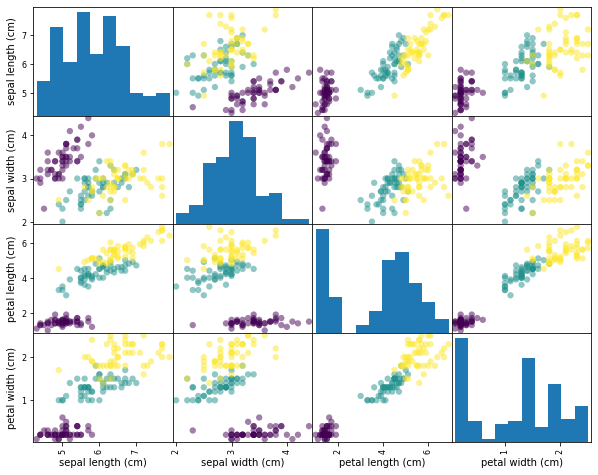

In [8]:
pd.plotting.scatter_matrix(
    df, 
    c=y, 
    figsize=[10,8],
    s=40,
    marker='o'
)
plt.show()

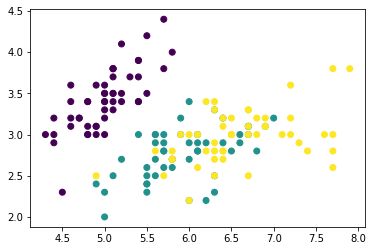

In [9]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y)
plt.show()

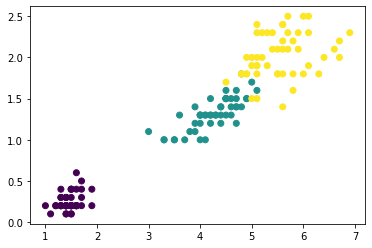

In [10]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=y)
plt.show()

## Modelo

### Ajuste de los datos

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

**Definimos el número óptimo de vecinos**

In [12]:
vecinos = []
score = []

for i in range(1,100):
    model = KNeighborsClassifier(n_neighbors=i)    
    model.fit(X_train, y_train)
    
    vecinos.append(i)
    score.append(model.score(X_test, y_test))

In [13]:
df = pd.DataFrame({
    'VECINOS': vecinos,
    'PUNTAJE': score
})

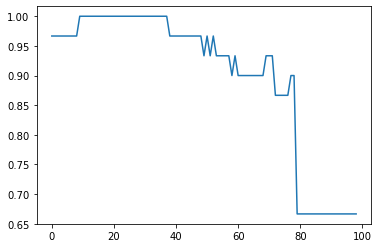

In [14]:
plt.plot(df['PUNTAJE'])
plt.show()

In [15]:
model = KNeighborsClassifier(n_neighbors=6)

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [17]:
y_pred = model.predict(X_test)
y_pred 

array([2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1])

In [18]:
print(f'La presición del modelo es de: {round(model.score(X_test, y_test),2)*100}%')

La presición del modelo es de: 97.0%


### Evaluación del Modelo

In [19]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

